In [13]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import sklearn as sk
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import GridSearchCV

# Part 1

In [7]:
data = pd.read_csv("AmesHousing.csv")

columns_keep = data.isna().sum() < 100
data = data.loc[:,columns_keep]

data = data.dropna()
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [17]:
X = data.drop(["SalePrice", "Order", "PID"], axis = 1)
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2 ,random_state=40)

In [24]:
ct = ColumnTransformer(
    [
        ('standardize', StandardScaler(), make_column_selector(dtype_include=np.number)),
        ('dummify', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include=object))
    ],
    remainder= 'passthrough'
)

X_dummy = ct.fit_transform(X)
pd.DataFrame(X_dummy)

lr_pipeline = Pipeline(
    [
        ('preprocessing', ct),
        ('lr', LinearRegression())
    ]
)

ridge_pipeline = Pipeline(
    [
        ('preprocessing', ct),
        ('ridge', Ridge(alpha=1))
    ]
)

lr_cv = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression MSE:", -lr_cv.mean().round(2))
print("Ridge Regression MSE:", -ridge_cv.mean().round(2))

Linear Regression MSE: 1.3505423082600165e+28
Ridge Regression MSE: 878606253.14
Linear Regression MSE: 1.3505423082600165e+28
Ridge Regression MSE: 878606253.14


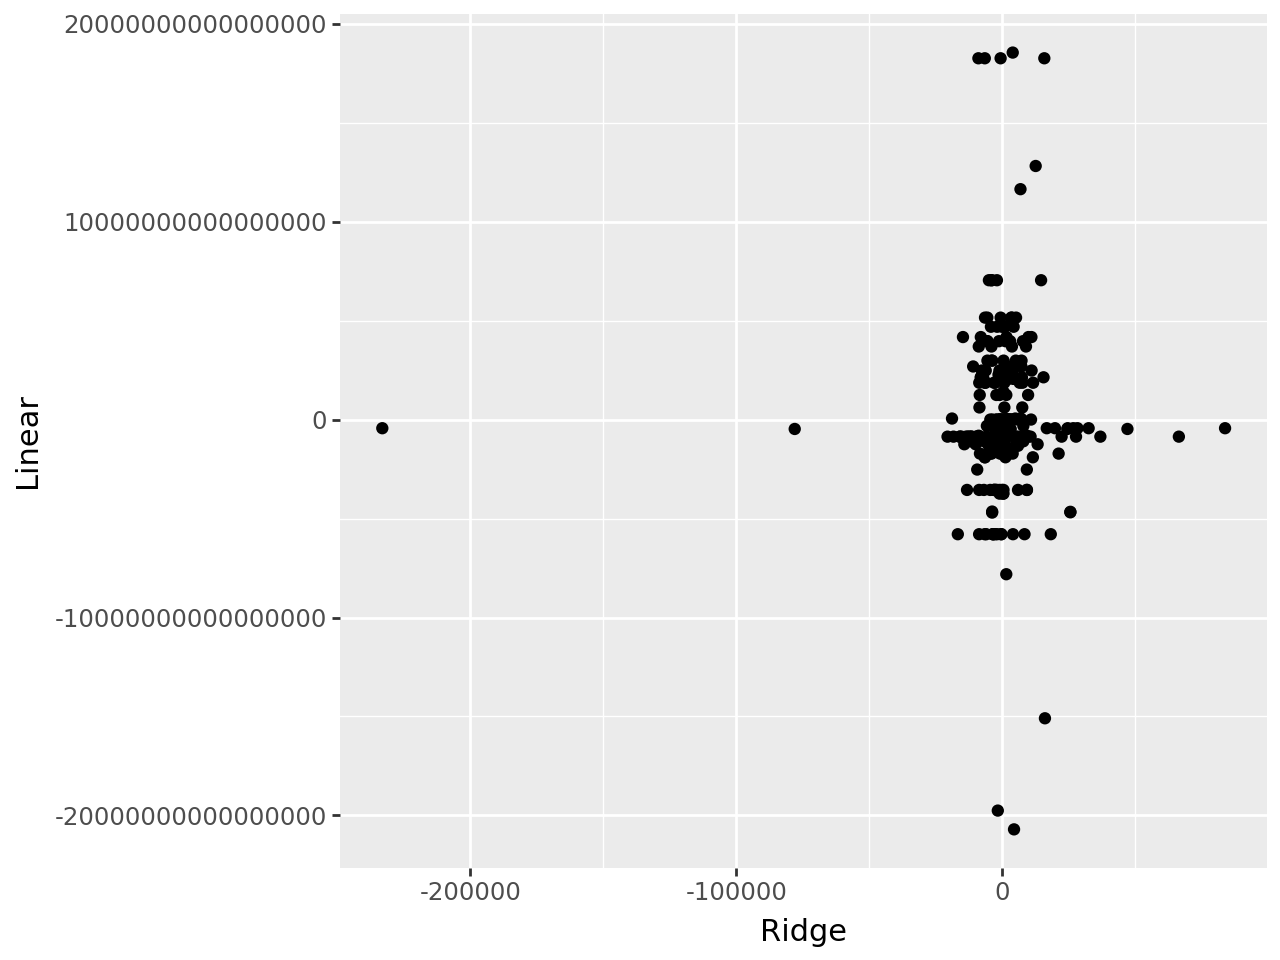

In [31]:
from plotnine import *
lr_model = lr_pipeline.fit(X,y)
ridge_modge = ridge_pipeline.fit(X,y)

ridge_coefs = ridge_pipeline.named_steps["ridge"].coef_
lr_coefs = lr_pipeline.named_steps["lr"].coef_

names = ct.get_feature_names_out()

coef_data = pd.DataFrame({
    "Names": names,
    "Ridge": ridge_coefs,
    "Linear": lr_coefs
})

(ggplot(coef_data, aes(x='Ridge', y='Linear'))
+ geom_point()
)


# Part 2

In [36]:
parameters = {
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=parameters,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1
)

grid_search.fit(X, y)

pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062412,0.051367,0.013953,0.003449,0.001,{'ridge__alpha': 0.001},-7.879837e+08,-5.055365e+08,-1.232594e+09,-1.558419e+09,-5.521019e+08,-9.273271e+08,4.073286e+08,6
1,0.042486,0.003295,0.012563,0.004264,0.01,{'ridge__alpha': 0.01},-7.875414e+08,-5.043629e+08,-1.231952e+09,-1.555683e+09,-5.490131e+08,-9.257105e+08,4.072283e+08,5
2,0.041482,0.006456,0.016133,0.002747,0.1,{'ridge__alpha': 0.1},-7.844687e+08,-4.948191e+08,-1.226204e+09,-1.533577e+09,-5.252551e+08,-9.128649e+08,4.061908e+08,4
3,0.043209,0.004602,0.013981,0.002963,1,{'ridge__alpha': 1},-7.812889e+08,-4.658465e+08,-1.198009e+09,-1.468869e+09,-4.790183e+08,-8.786063e+08,3.974769e+08,2
4,0.044355,0.002668,0.011830,0.001663,10,{'ridge__alpha': 10},-7.843267e+08,-4.468206e+08,-1.165080e+09,-1.455916e+09,-4.723607e+08,-8.649009e+08,3.936439e+08,1
5,0.041584,0.003648,0.011915,0.003388,100,{'ridge__alpha': 100},-8.610209e+08,-4.402347e+08,-1.206868e+09,-1.558299e+09,-4.809330e+08,-9.094712e+08,4.279248e+08,3
6,0.040313,0.005737,0.011710,0.001943,1000,{'ridge__alpha': 1000},-1.134543e+09,-5.779050e+08,-1.264095e+09,-1.725513e+09,-6.446800e+08,-1.069347e+09,4.229867e+08,7


Since alpha of 10 is ranked as the number 1 parameter, we see that it has the lowest MSE value and is the best fit for our model.

# Part 3

In [37]:
lasso_pipeline = Pipeline(
    [
        ("preprocessing", ct),  
        ("regression", Lasso())
    ]
)

param_grid = {
    "regression__alpha": [0.01, 0.1, 1, 10, 100]
}

grid_search_lasso = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1
)

grid_search_lasso.fit(X, y)

pd.DataFrame(grid_search_lasso.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+11, tolerance: 1.348e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+11, tolerance: 1.407e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+11, tolerance: 1.477e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+11, tolerance: 1.348e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+11, tolerance: 1.474e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e+11, tolerance: 1.463e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+11, tolerance: 1.407e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+11, tolerance: 1.477e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.677e+10, tolerance: 1.463e+09


C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+10, tolerance: 1.477e+09


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.333200,0.011626,0.013672,0.002538,0.01,{'regression__alpha': 0.01},-7.885960e+08,-5.055638e+08,-1.221834e+09,-1.545229e+09,-5.257274e+08,-9.173900e+08,4.065602e+08,5
1,0.308565,0.031414,0.013335,0.001123,0.1,{'regression__alpha': 0.1},-7.881930e+08,-5.052842e+08,-1.192170e+09,-1.545133e+09,-5.265227e+08,-9.114606e+08,4.021666e+08,4
2,0.268566,0.048243,0.014245,0.004688,1,{'regression__alpha': 1},-7.844575e+08,-5.025362e+08,-1.186436e+09,-1.543606e+09,-5.235244e+08,-9.081119e+08,4.022452e+08,3
3,0.107809,0.024164,0.014897,0.005497,10,{'regression__alpha': 10},-7.612788e+08,-4.792367e+08,-1.160258e+09,-1.527527e+09,-5.048795e+08,-8.866362e+08,4.032462e+08,2
4,0.112156,0.005560,0.012678,0.001639,100,{'regression__alpha': 100},-7.533603e+08,-4.263859e+08,-1.136946e+09,-1.480782e+09,-4.476117e+08,-8.490172e+08,4.076577e+08,1


The results show that using alpha of 100 for the lasso regression has the lowest MSE and is th optimal choice. It also has a lowest MSE than the ridge regression and linear regression models did.

In [64]:
best_lasso = grid_search_lasso.best_estimator_
lasso_coefs = best_lasso.named_steps["regression"].coef_

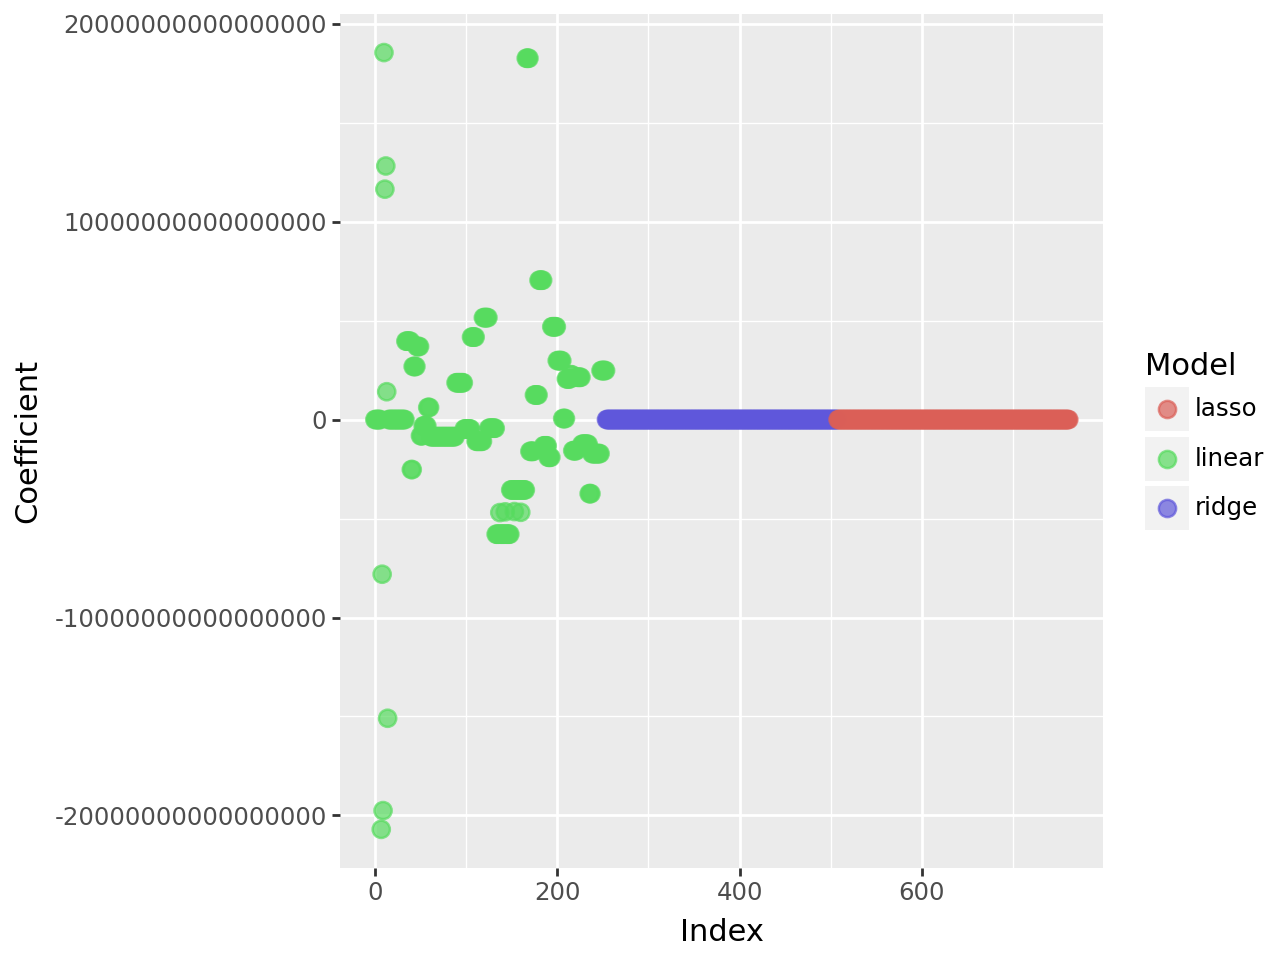

In [63]:
combined_coefs = np.concatenate([lr_coefs, ridge_coefs, lasso_coefs])
model_type = ["linear"] * len(lr_coefs) + ["ridge"] * len(ridge_coefs) + ["lasso"] * len(lasso_coefs)

coefs_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "Model": model_type
})

coefs_df['Index'] = np.arange(len(coefs_df))

(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)
)

Here we can see that the coefficients for the ridge and the lasso model are relatively similar. The lasso coefficients are much less variable than the linear model coefficients. 

# Part 4

In [58]:
elastic_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("elastic_net", ElasticNet(alpha = 0.001, l1_ratio=1))
    ]
)
elastic_pipeline.fit(X, y)
parameters = {
    "elastic_net__alpha": [ 0.1, 1, 10, 100], 
    "elastic_net__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]  
}

grid_search_elastic_net = GridSearchCV(
    estimator=elastic_pipeline,
    param_grid=parameters,
    scoring="neg_mean_squared_error",
    cv=5, 
    verbose=1
)

grid_search_elastic_net.fit(X, y)
pd.DataFrame(grid_search_elastic_net.cv_results_)

C:\Users\rtnee\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.910e+11, tolerance: 1.793e+09


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elastic_net__alpha,param_elastic_net__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078409,0.003672,0.012490,0.003215,0.1,0.1,"{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.1}",-9.125046e+08,-4.592055e+08,-1.229130e+09,-1.608471e+09,-5.084832e+08,-9.435588e+08,4.355485e+08,5
1,0.080987,0.020308,0.017981,0.001820,0.1,0.3,"{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.3}",-8.922896e+08,-4.506398e+08,-1.221718e+09,-1.590417e+09,-4.968898e+08,-9.303909e+08,4.335994e+08,4
2,0.076809,0.003344,0.014277,0.003014,0.1,0.5,"{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.5}",-8.686595e+08,-4.423848e+08,-1.210898e+09,-1.566644e+09,-4.845289e+08,-9.146230e+08,4.296539e+08,3
3,0.084098,0.002689,0.014988,0.000715,0.1,0.7,"{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.7}",-8.390124e+08,-4.358939e+08,-1.194073e+09,-1.532621e+09,-4.722213e+08,-8.947642e+08,4.215825e+08,2
4,0.153723,0.007654,0.012357,0.003158,0.1,0.9,"{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.9}",-7.975571e+08,-4.387697e+08,-1.168181e+09,-1.476925e+09,-4.669315e+08,-8.696730e+08,4.027261e+08,1
5,0.051529,0.002859,0.014153,0.001706,1,0.1,"{'elastic_net__alpha': 1, 'elastic_net__l1_ratio': 0.1}",-1.343826e+09,-6.910579e+08,-1.301286e+09,-1.800060e+09,-7.668437e+08,-1.180615e+09,4.088483e+08,10
6,0.047959,0.002898,0.013799,0.004009,1,0.3,"{'elastic_net__alpha': 1, 'elastic_net__l1_ratio': 0.3}",-1.256190e+09,-6.438537e+08,-1.283199e+09,-1.768839e+09,-7.164393e+08,-1.133704e+09,4.134759e+08,9
7,0.045615,0.007280,0.014056,0.005949,1,0.5,"{'elastic_net__alpha': 1, 'elastic_net__l1_ratio': 0.5}",-1.162754e+09,-5.933352e+08,-1.267975e+09,-1.735895e+09,-6.615971e+08,-1.084311e+09,4.205216e+08,8
8,0.056011,0.002463,0.012343,0.001954,1,0.7,"{'elastic_net__alpha': 1, 'elastic_net__l1_ratio': 0.7}",-1.058307e+09,-5.360804e+08,-1.255008e+09,-1.695261e+09,-5.983940e+08,-1.028610e+09,4.299377e+08,7
9,0.063977,0.006326,0.013913,0.001058,1,0.9,"{'elastic_net__alpha': 1, 'elastic_net__l1_ratio': 0.9}",-9.218998e+08,-4.635300e+08,-1.232162e+09,-1.616165e+09,-5.140287e+08,-9.495570e+08,4.360971e+08,6


The model with the lowest average MSE has an alpha of .1 and the optimal L1 ratio is 0.9. The MSE for this model is lower than the ridge regression and linear regression but it is not lower than the lasso regression. 

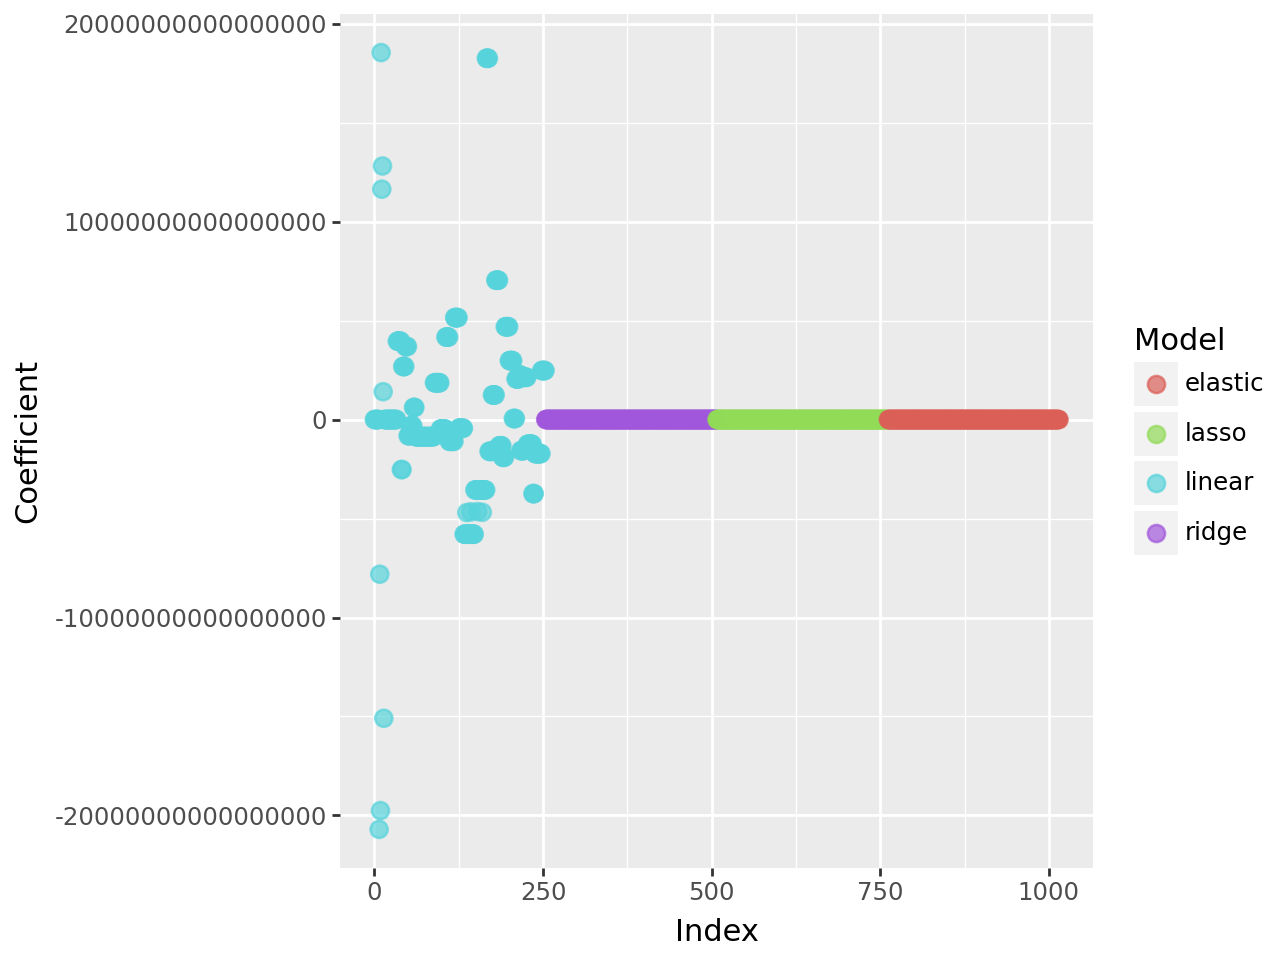

In [62]:
en_coefs = elastic_pipeline.named_steps["elastic_net"].coef_

combined_coefs = np.concatenate([lr_coefs, ridge_coefs, lasso_coefs, en_coefs])
model_type = ["linear"] * len(lr_coefs) + ["ridge"] * len(ridge_coefs) + ["lasso"] * len(lasso_coefs) + ["elastic"] * len(en_coefs)

coefs_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "Model": model_type
})

coefs_df['Index'] = np.arange(len(coefs_df))

(
    ggplot(coefs_df, aes(x='Index', y='Coefficient', color='Model'))
    + geom_point(size=3, alpha=0.7)
)

We can see that the coefficents are similar for the elastic, ridge, and lasso models as they are more similar to each other than the linear regression model. The linear model has much more variability in the coefficents for each variable. It's hard to tell the difference in the coefficents for the elastic model and the lasso/ridge models due to the large range of the y-axis.